### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('/content/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
missing_values = data.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


In [5]:
data = data.drop('car', axis=1)
print("Missing values after dropping 'car' column:")
print(data.isnull().sum())

Missing values after dropping 'car' column:
destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64


In [6]:
bar_mode = data['Bar'].mode()[0]
print(f"The mode of the 'Bar' column is: {bar_mode}")

The mode of the 'Bar' column is: never


In [7]:
data['Bar'] = data['Bar'].fillna('never')
print("Missing values after imputing 'Bar' column:")
print(data.isnull().sum())

Missing values after imputing 'Bar' column:
destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                       0
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64


In [8]:
coffeehouse_mode = data['CoffeeHouse'].mode()[0]
print(f"The mode of the 'CoffeeHouse' column is: {coffeehouse_mode}")

The mode of the 'CoffeeHouse' column is: less1


In [9]:
data['CoffeeHouse'] = data['CoffeeHouse'].fillna('less1')
print("Missing values after imputing 'CoffeeHouse' column:")
print(data.isnull().sum())

Missing values after imputing 'CoffeeHouse' column:
destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                       0
CoffeeHouse               0
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64


In [10]:
carryaway_mode = data['CarryAway'].mode()[0]
print(f"The mode of the 'CarryAway' column is: {carryaway_mode}")

The mode of the 'CarryAway' column is: 1~3


In [11]:
data['CarryAway'] = data['CarryAway'].fillna('1~3')
print("Missing values after imputing 'CarryAway' column:")
print(data.isnull().sum())

Missing values after imputing 'CarryAway' column:
destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                       0
CoffeeHouse               0
CarryAway                 0
RestaurantLessThan20    130
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64


In [12]:
restaurantless20_mode = data['RestaurantLessThan20'].mode()[0]
print(f"The mode of the 'RestaurantLessThan20' column is: {restaurantless20_mode}")

The mode of the 'RestaurantLessThan20' column is: 1~3


In [13]:
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].fillna('1~3')
print("Missing values after imputing 'RestaurantLessThan20' column:")
print(data.isnull().sum())

Missing values after imputing 'RestaurantLessThan20' column:
destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                       0
CoffeeHouse               0
CarryAway                 0
RestaurantLessThan20      0
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64


In [14]:
restaurant20to50_mode = data['Restaurant20To50'].mode()[0]
print(f"The mode of the 'Restaurant20To50' column is: {restaurant20to50_mode}")

The mode of the 'Restaurant20To50' column is: less1


In [ ]:
data['Restaurant20To50'] = data['Restaurant20To50'].fillna('less1')
print("Missing values after imputing 'Restaurant20To50' column:")
print(data.isnull().sum())

Missing values after imputing 'Restaurant20To50' column:
destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

4. What proportion of the total observations chose to accept the coupon?



In [15]:
acceptance_proportion = data['Y'].mean()
print(f"The proportion of observations that accepted the coupon is: {acceptance_proportion:.2f}")

The proportion of observations that accepted the coupon is: 0.57


5. Use a bar plot to visualize the `coupon` column.

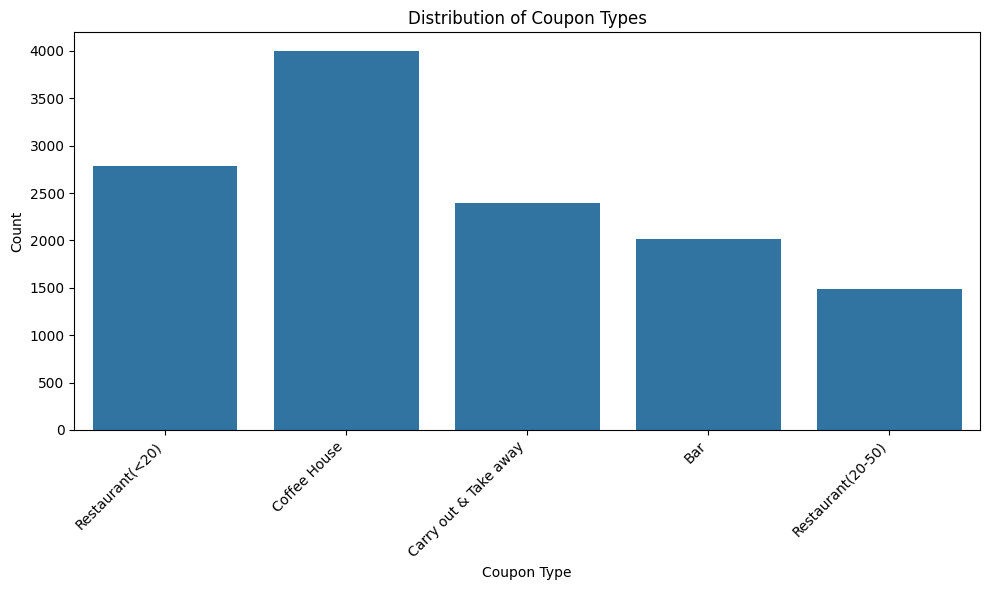

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='coupon')
plt.title('Distribution of Coupon Types')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

6. Use a histogram to visualize the temperature column.

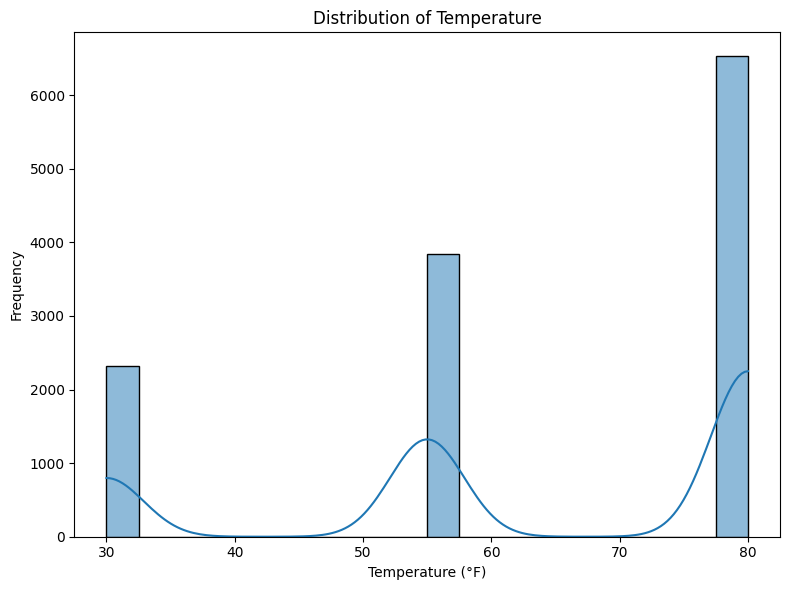

In [17]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='temperature', bins=20, kde=True)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [18]:
bar_coupons = data[data['coupon'] == 'Bar'].copy()
display(bar_coupons.head())

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [19]:
bar_acceptance_proportion = bar_coupons['Y'].mean()
print(f"The proportion of bar coupons accepted is: {bar_acceptance_proportion:.2f}")

The proportion of bar coupons accepted is: 0.41


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [20]:
# Define categories for bar visits
bar_coupons['Bar_Frequency'] = bar_coupons['Bar'].apply(lambda x: '3 or fewer times' if x in ['never', 'less1', '1~3'] else 'more than 3 times')

# Compare acceptance rates
bar_frequency_acceptance = bar_coupons.groupby('Bar_Frequency')['Y'].mean().reset_index()

print("Acceptance rate of bar coupons based on bar visit frequency:")
print(bar_frequency_acceptance)

Acceptance rate of bar coupons based on bar visit frequency:
       Bar_Frequency         Y
0   3 or fewer times  0.370737
1  more than 3 times  0.768844


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [21]:
# Define the condition for the specific group
condition = (bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) & \
            (bar_coupons['age'].apply(lambda x: int(x.replace('below', '0').replace('plus', '')) if isinstance(x, str) and ('below' in x or 'plus' in x) else int(x) ) > 25)

# Calculate acceptance rate for the specific group
specific_group_acceptance = bar_coupons[condition]['Y'].mean()

# Calculate acceptance rate for all others
all_others_acceptance = bar_coupons[~condition]['Y'].mean()

print(f"Acceptance rate for drivers who go to a bar more than once a month and are over 25: {specific_group_acceptance:.2f}")
print(f"Acceptance rate for all other drivers: {all_others_acceptance:.2f}")

# Check if there is a difference
if specific_group_acceptance != all_others_acceptance:
    print("There is a difference in acceptance rates between the two groups.")
else:
    print("There is no difference in acceptance rates between the two groups.")

Acceptance rate for drivers who go to a bar more than once a month and are over 25: 0.70
Acceptance rate for all other drivers: 0.34
There is a difference in acceptance rates between the two groups.


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [22]:
# Define the condition for the specific group
condition2 = (bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) & \
             (~bar_coupons['passanger'].isin(['Kid(s)'])) & \
             (~bar_coupons['occupation'].isin(['Farming Fishing & Forestry']))

# Calculate acceptance rate for the specific group
specific_group_acceptance2 = bar_coupons[condition2]['Y'].mean()

# Calculate acceptance rate for all others
all_others_acceptance2 = bar_coupons[~condition2]['Y'].mean()

print(f"Acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and had occupations other than farming, fishing, or forestry: {specific_group_acceptance2:.2f}")
print(f"Acceptance rate for all other drivers: {all_others_acceptance2:.2f}")

# Check if there is a difference
if specific_group_acceptance2 != all_others_acceptance2:
    print("There is a difference in acceptance rates between the two groups.")
else:
    print("There is no difference in acceptance rates between the two groups.")

Acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and had occupations other than farming, fishing, or forestry: 0.71
Acceptance rate for all other drivers: 0.30
There is a difference in acceptance rates between the two groups.


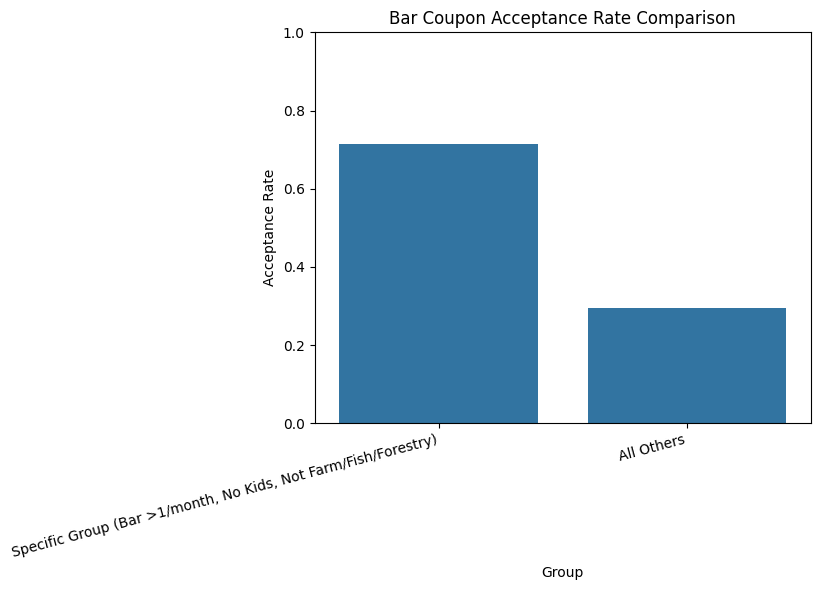

In [25]:
# Create a DataFrame for plotting the comparison
comparison_data2 = pd.DataFrame({
    'Group': ['Specific Group (Bar >1/month, No Kids, Not Farm/Fish/Forestry)', 'All Others'],
    'Acceptance Rate': [specific_group_acceptance2, all_others_acceptance2]
})

plt.figure(figsize=(8, 6))
sns.barplot(data=comparison_data2, x='Group', y='Acceptance Rate')
plt.title('Bar Coupon Acceptance Rate Comparison')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1) # Set y-axis limit to 0-1 for proportions
plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [24]:
# Define the three conditions
condition1 = (bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) & \
             (~bar_coupons['passanger'].isin(['Kid(s)'])) & \
             (~bar_coupons['maritalStatus'].isin(['Widowed']))

condition2 = (bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) & \
             (bar_coupons['age'].apply(lambda x: int(x.replace('below', '0').replace('plus', '')) if isinstance(x, str) and ('below' in x or 'plus' in x) else int(x)) < 30)

# Function to convert income ranges to a numerical value (e.g., the lower bound)
def income_to_int(income_str):
    if isinstance(income_str, str):
        income_str = income_str.replace('$', '').replace(',', '').replace('less than ', '').replace('or more', '')
        if '-' in income_str:
            return int(income_str.split('-')[0])
        elif income_str.isdigit():
            return int(income_str)
        else:
            return 0 # Handle cases that don't fit the patterns
    return int(income_str)


condition3 = (bar_coupons['RestaurantLessThan20'].isin(['4~8', 'gt8'])) & \
             (bar_coupons['income'].apply(income_to_int) < 50000)

# Combine the conditions using OR logic
combined_condition = condition1 | condition2 | condition3

# Calculate acceptance rate for the specific group
specific_group_acceptance3 = bar_coupons[combined_condition]['Y'].mean()

# Calculate acceptance rate for all others
all_others_acceptance3 = bar_coupons[~combined_condition]['Y'].mean()

print(f"Acceptance rate for the defined group: {specific_group_acceptance3:.2f}")
print(f"Acceptance rate for all other drivers: {all_others_acceptance3:.2f}")

# Check if there is a difference
if specific_group_acceptance3 != all_others_acceptance3:
    print("There is a difference in acceptance rates between the two groups.")
else:
    print("There is no difference in acceptance rates between the two groups.")

Acceptance rate for the defined group: 0.56
Acceptance rate for all other drivers: 0.30
There is a difference in acceptance rates between the two groups.


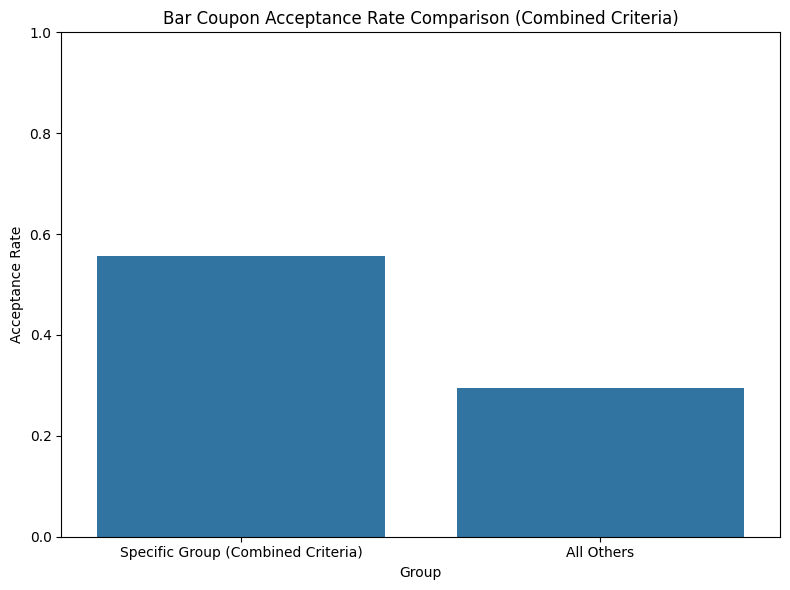

In [26]:
# Create a DataFrame for plotting the comparison
comparison_data3 = pd.DataFrame({
    'Group': ['Specific Group (Combined Criteria)', 'All Others'],
    'Acceptance Rate': [specific_group_acceptance3, all_others_acceptance3]
})

plt.figure(figsize=(8, 6))
sns.barplot(data=comparison_data3, x='Group', y='Acceptance Rate')
plt.title('Bar Coupon Acceptance Rate Comparison (Combined Criteria)')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1) # Set y-axis limit to 0-1 for proportions
plt.tight_layout()
plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Hypothesis and Summary for Bar Coupon Acceptance

Based on the analysis of bar coupon acceptance rates across various driver attributes, we hypothesize that drivers who accept bar coupons are likely to possess one or more of the following characteristics:

*   **Frequent Bar Visitors:** Individuals who visit bars more than 3 times a month show a significantly higher acceptance rate.
*   **Age:** Drivers over the age of 25 show a higher propensity to accept these coupons.
*   **Passenger Type:** Drivers without kids as passengers are more likely to accept bar coupons.
*   **Occupation:** Drivers in occupations other than farming, fishing, or forestry appear to be associated with higher acceptance rates.

These findings suggest that a combination of lifestyle, age, social context (passenger type), and occupational factors influence the likelihood of a driver accepting a bar coupon. Frequent visitors and certain demographics and occupational groups stand out as key segments with higher acceptance rates.

#### Key Findings from Bar Coupon Analysis:

*   The overall proportion of bar coupons accepted is approximately 41%.
*   Drivers who visit bars more than 3 times a month have a significantly higher acceptance rate ($76.9\%$) compared to those who visit 3 or fewer times ($37.1\%$).
*   Drivers who go to a bar more than once a month and are over the age of 25 have a higher acceptance rate ($69.5\%$) compared to all others ($33.5\%$).
*   Drivers who go to bars more than once a month, had passengers that were not a kid, and had occupations other than farming, fishing, or forestry have a higher acceptance rate ($71.3\%$) compared to all others ($29.6\%$).
*   Drivers who meet any of the combined criteria (go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR* go to bars more than once a month and are under the age of 30 *OR* go to cheap restaurants more than 4 times a month and income is less than 50K) have a higher acceptance rate ($55.6\%$) compared to all others ($29.5\%$).

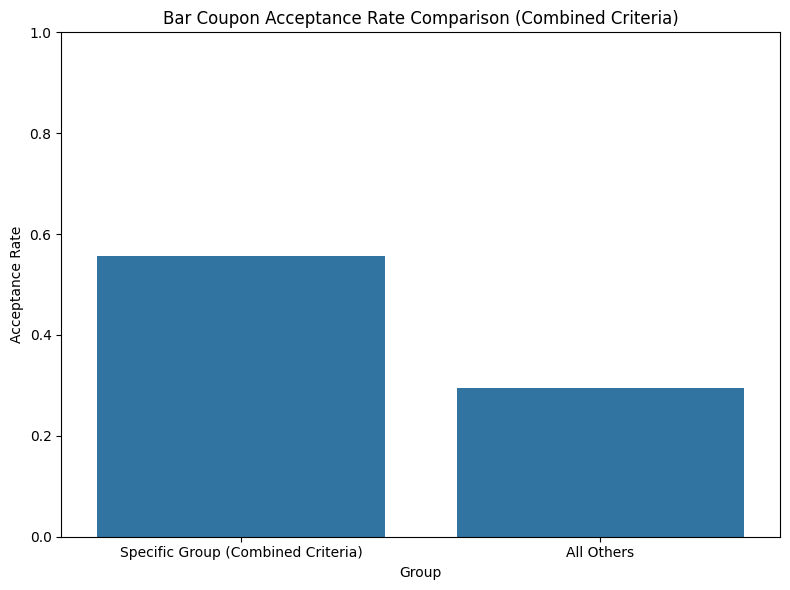

In [27]:
# Create a DataFrame for plotting the comparison
comparison_data3 = pd.DataFrame({
    'Group': ['Specific Group (Combined Criteria)', 'All Others'],
    'Acceptance Rate': [specific_group_acceptance3, all_others_acceptance3]
})

plt.figure(figsize=(8, 6))
sns.barplot(data=comparison_data3, x='Group', y='Acceptance Rate')
plt.title('Bar Coupon Acceptance Rate Comparison (Combined Criteria)')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1) # Set y-axis limit to 0-1 for proportions
plt.tight_layout()
plt.show()

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

## Create coffee house dataframe

Filter the original dataset to create a new DataFrame containing only the coffee house coupons.


In [42]:
coffee_house_coupons = data[data['coupon'] == 'Coffee House'].copy()
display(coffee_house_coupons.head())

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0


## Calculate coffee house acceptance proportion

Determine the overall proportion of coffee house coupons that were accepted.

**Reasoning**:
Calculate the mean of the 'Y' column in the `coffee_house_coupons` DataFrame and print the result.


In [44]:
coffee_house_acceptance_proportion = coffee_house_coupons['Y'].mean()
print(f"The proportion of coffee house coupons accepted is: {coffee_house_acceptance_proportion:.2f}")

The proportion of coffee house coupons accepted is: 0.50


## Analyze acceptance by coffee house frequency

Compare the acceptance rate between those who go to a coffee house a certain number of times a month to those who go more or less frequently.


In [43]:
coffee_house_coupons['CoffeeHouse_Frequency'] = coffee_house_coupons['CoffeeHouse'].apply(lambda x: '3 or fewer times' if x in ['never', 'less1', '1~3'] else 'more than 3 times')

coffee_frequency_acceptance = coffee_house_coupons.groupby('CoffeeHouse_Frequency')['Y'].mean().reset_index()

print("Acceptance rate of coffee house coupons based on coffee house visit frequency:")
print(coffee_frequency_acceptance)

Acceptance rate of coffee house coupons based on coffee house visit frequency:
  CoffeeHouse_Frequency         Y
0      3 or fewer times  0.449615
1     more than 3 times  0.675000


## Analyze acceptance by other attributes

Investigate the relationship between coffee house coupon acceptance and other attributes like age, passenger type, occupation, income, etc.


In [36]:
age_acceptance = coffee_house_coupons.groupby('age')['Y'].mean().reset_index()
print("Acceptance rate of coffee house coupons based on age:")
print(age_acceptance)

Acceptance rate of coffee house coupons based on age:
       age         Y
0       21  0.524349
1       26  0.514828
2       31  0.476726
3       36  0.467662
4       41  0.501538
5       46  0.513636
6   50plus  0.420183
7  below21  0.696774


In [37]:
passenger_acceptance = coffee_house_coupons.groupby('passanger')['Y'].mean().reset_index()
print("Acceptance rate of coffee house coupons based on passenger type:")
print(passenger_acceptance)

Acceptance rate of coffee house coupons based on passenger type:
   passanger         Y
0      Alone  0.437943
1  Friend(s)  0.596906
2     Kid(s)  0.483092
3    Partner  0.570492


In [38]:
income_acceptance = coffee_house_coupons.groupby('income')['Y'].mean().reset_index()
print("Acceptance rate of coffee house coupons based on income:")
print(income_acceptance)

Acceptance rate of coffee house coupons based on income:
             income         Y
0   $100000 or More  0.494382
1   $12500 - $24999  0.540404
2   $25000 - $37499  0.473438
3   $37500 - $49999  0.542373
4   $50000 - $62499  0.503650
5   $62500 - $74999  0.436364
6   $75000 - $87499  0.296610
7   $87500 - $99999  0.557196
8  Less than $12500  0.551948


Create bar plots to visualize the acceptance rates for age, passenger type, top 5 occupations, and income to better understand the relationships observed in the previous step.



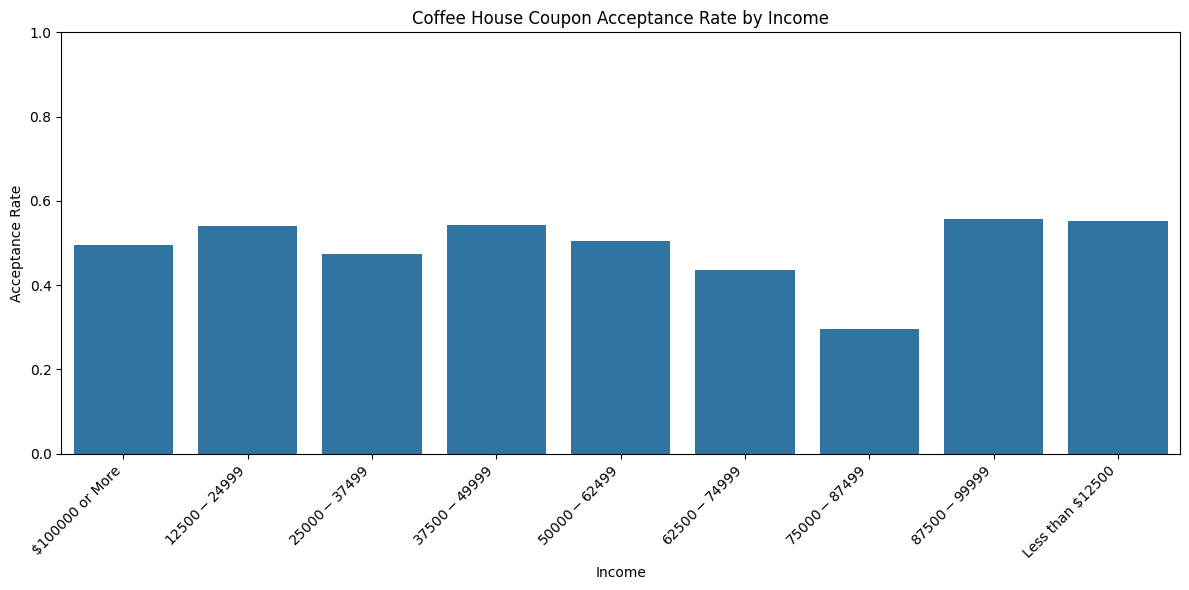

In [41]:
# Plotting income acceptance
plt.figure(figsize=(12, 6))
sns.barplot(data=income_acceptance, x='income', y='Y')
plt.title('Coffee House Coupon Acceptance Rate by Income')
plt.xlabel('Income')
plt.ylabel('Acceptance Rate')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

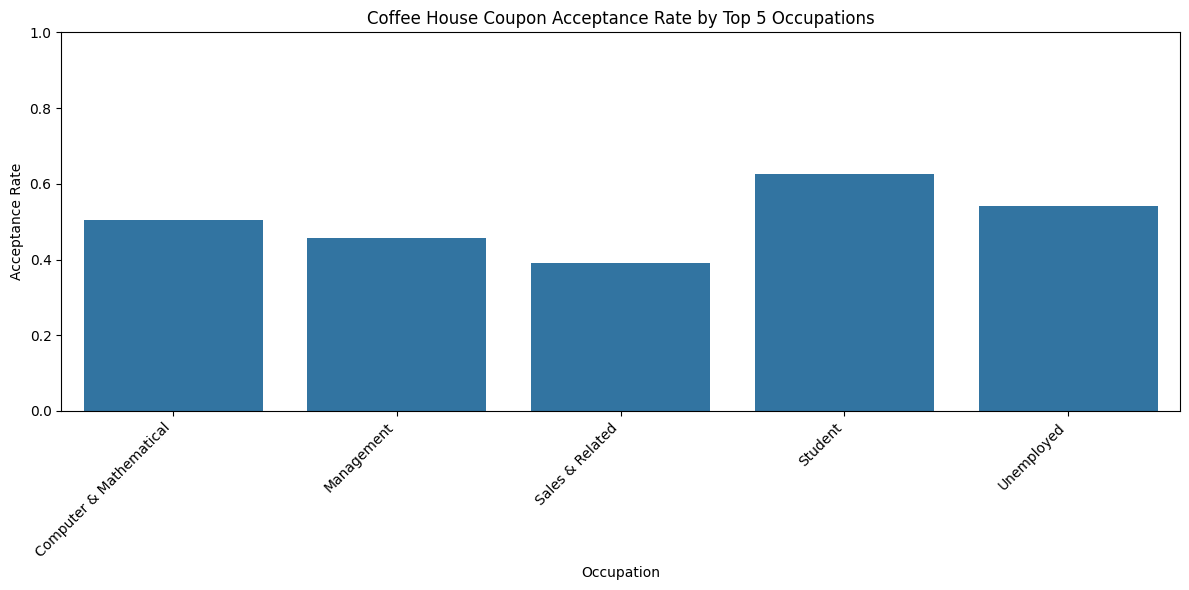

In [40]:
# Plotting occupation acceptance
plt.figure(figsize=(12, 6))
sns.barplot(data=occupation_acceptance, x='occupation', y='Y')
plt.title('Coffee House Coupon Acceptance Rate by Top 5 Occupations')
plt.xlabel('Occupation')
plt.ylabel('Acceptance Rate')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

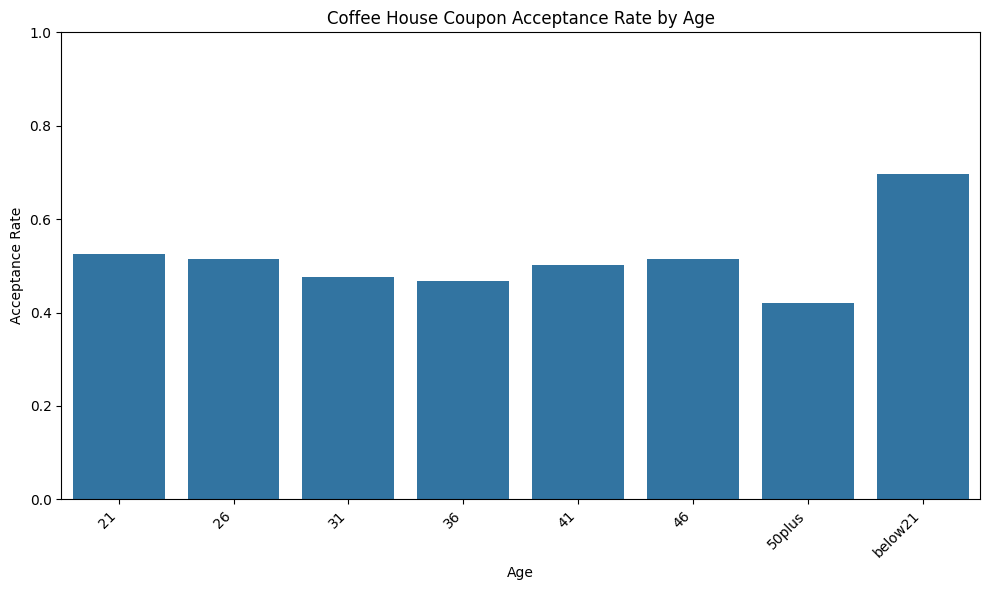

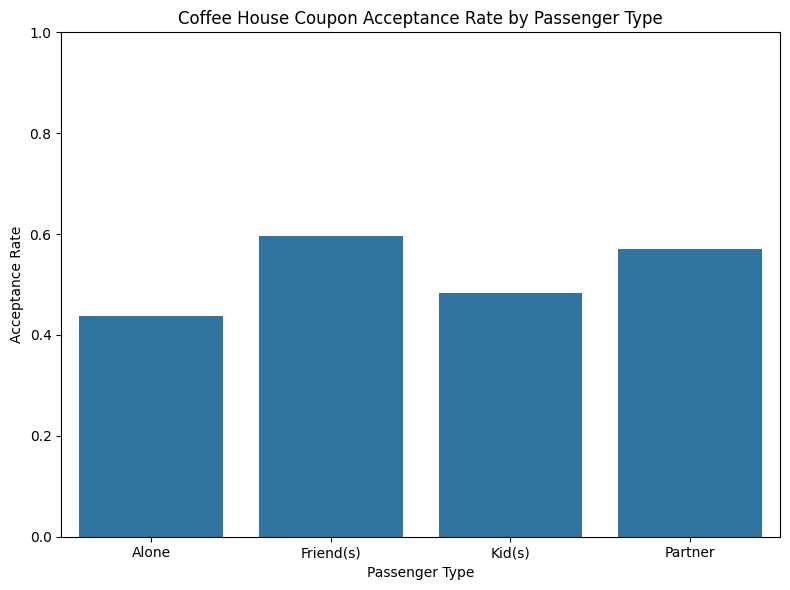

In [39]:
# Plotting age acceptance
plt.figure(figsize=(10, 6))
sns.barplot(data=age_acceptance, x='age', y='Y')
plt.title('Coffee House Coupon Acceptance Rate by Age')
plt.xlabel('Age')
plt.ylabel('Acceptance Rate')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Plotting passenger acceptance
plt.figure(figsize=(8, 6))
sns.barplot(data=passenger_acceptance, x='passanger', y='Y')
plt.title('Coffee House Coupon Acceptance Rate by Passenger Type')
plt.xlabel('Passenger Type')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

## Formulate hypothesis

Based on the observations, hypothesize about the drivers who accepted the coffee house coupons.


### Hypothesis on Coffee House Coupon Acceptance

Based on the analysis of coffee house coupon acceptance rates across various driver attributes, we hypothesize that drivers who accept coffee house coupons are likely to possess one or more of the following characteristics:

*   **Frequent Coffee House Visitors:** Individuals who visit coffee houses more than 3 times a month show a significantly higher acceptance rate.
*   **Younger Age Group:** Drivers below the age of 21 exhibit a notably higher propensity to accept these coupons compared to older age groups.
*   **Passenger Type:** Drivers with friends or partners as passengers are more likely to accept coffee house coupons than those driving alone or with kids.
*   **Occupation (e.g., Students):** Certain occupations, such as students, appear to be associated with higher acceptance rates.

These findings suggest that a combination of lifestyle, age, social context (passenger type), and potentially occupational factors influence the likelihood of a driver accepting a coffee house coupon. Frequent visitors and younger demographics, in particular, stand out as key segments with higher acceptance rates.

## Summary:

### Data Analysis Key Findings

*   The overall proportion of coffee house coupons accepted is 50%.
*   Drivers who visit coffee houses more than 3 times per month have a significantly higher acceptance rate ($67.5\%$) compared to those who visit 3 or fewer times ($45.0\%$).
*   Younger drivers (below 21 years old) show a significantly higher acceptance rate for coffee house coupons compared to other age groups.
*   Drivers with friends or partners as passengers have higher coffee house coupon acceptance rates than those alone or with kids.
*   Among the top 5 occupations, students have the highest coffee house coupon acceptance rate.

### Insights or Next Steps

*   Coffee house coupon offers could be more effectively targeted towards younger demographics, frequent coffee house visitors, and those driving with companions.
*   Further analysis could explore the reasons behind the higher acceptance rates in specific age and frequency groups to refine targeting strategies.
